### Задание:

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.
Построить график Precision - Recall на этих же данных.

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [40]:
# Импорт библиотек
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
# Определение признаков для обучения
X = data[data.columns[:-1]]

In [4]:
# Определение целевой переменной
Y = data['affair']

In [5]:
# Создание объекта логистической регрессии
model = LogisticRegression()

In [6]:
# Разделение данных а обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [7]:
# Обучение модели
model.fit(X_train, Y_train)

LogisticRegression()

In [8]:
# Предсказание значений
predictions = model.predict(X_test)

In [9]:
# Точность предсказания на обучающей выборке
model.score(X_train, Y_train)

0.7235188509874326

In [10]:
# Точность предсказания на тестовой выборке
model.score(X_test, Y_test)

0.7319371727748691

In [11]:
# Расчет матрицы ошибок
cm = confusion_matrix(Y_test, predictions)
cm

array([[1172,  131],
       [ 381,  226]], dtype=int64)

In [12]:
tp = cm[1][1] # True positive
fp = cm[0][1] # False positive
fn = cm[1][0] # False negative
tn = cm[0][0] # True negative

In [13]:
# Точность
accuracy = (tp+tn)/cm.sum()
accuracy

0.7319371727748691

In [14]:
precision = tp / (tp + fp)
precision

0.6330532212885154

In [15]:
recall = tp / (tp + fn)
recall

0.3723228995057661

In [101]:
# Расчет метрик при разных пороговых значениях

# Пороговое значение разделения классов
i = 0

FPR = [] # False positive rate
TPR = [] # True positive rate (Recall)
PRECISION = []

# Расчет вероятности пренадлежности элемента тестовой выборки к определенному классу 
predictions = model.predict_proba( X_test )
for _ in range(92):
    # Обнуление счетчика результатов предсказания
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    # Пересчет количества результатов предсказания для нового порогового значения
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):
        if predicted_prob > i:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                TP += 1
            else:
                FP += 1

        else:
            if actual == 1:
                FN += 1
            else:
                TN += 1
                
    # Пересчет метрик точности модели
    FPR.append(FP/(FP+TN))
    TPR.append(TP/(TP+FN))
    PRECISION.append(TP/(TP+FP))
    
    # Увеличение порогового значения
    i += 0.01

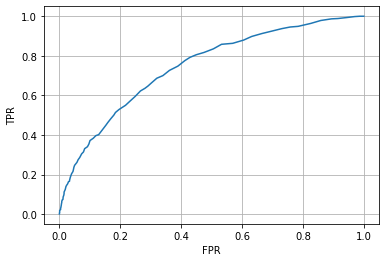

In [103]:
# Построение ROC-кривой
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

In [104]:
# Получение значениq false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

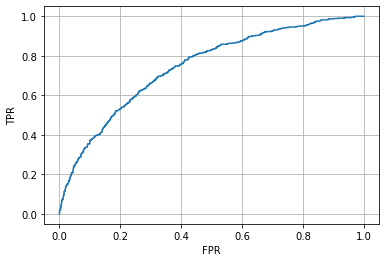

In [105]:
# Постороение ROC-кривой с помощью функции библиотеки SKlearn
plt.plot( fpr_, tpr_ )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

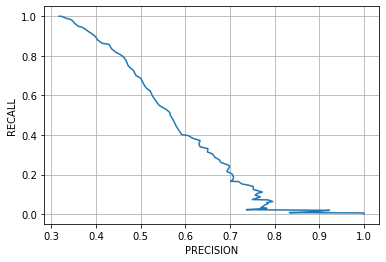

In [114]:
# Посторение кривой AUC-PR
plt.plot(PRECISION, TPR)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.grid()

In [110]:
# Получение значениq precision и recall для различных значений порога
pr, re, thresholds = precision_recall_curve(Y_test, predictions[:, 1])

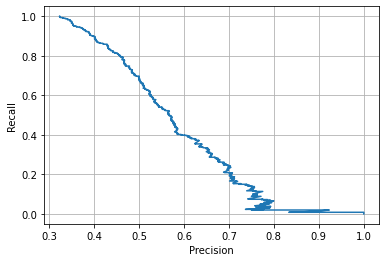

In [113]:
# Постороение ROC-кривой с помощью функции библиотеки SKlearn
plt.plot( pr, recall_ )
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid()

Выводы:

Обученная модель предсказывает событие с точностью 73%, причем ложноотрицательный результат дает в три раза чаще, чем ложноположительный (т.е. в три раза чаще пропускает "цель").

Графики зависимости метрик ROC AUC и AUC PRБ построенные при измении порогового значения в цикле и штатными средствами, идентичны.